# LAB WORK NO.1 - Homographies for Computer Vision

## Table of contents


1. [Required libraries](#Required-libraries)

2. [Load the images](#Load-the-images)

2. [Task 1](#Task-1)

3. [Task 2](#Task-2)

4. [Task 3](#Task-3)

5. [Task 4](#Task-4)

## Required libraries
[[go back to the top] ](#Table-of-contents)

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


## Load the images
[[go back to the top] ](#Table-of-contents)

In [ ]:
# Define img dir in a var
image_dir = "images/"

## Task 1
[[go back to the top] ](#Table-of-contents)

In [ ]:
# Load object and scene images 
# Comment out the examples you don't want to run

# example 1: wally and wally_scene
# object_img = cv2.imread(os.path.join(image_dir, 'wally.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'find_wally.jpeg'))
# example 2: box and box_scene
# object_img = cv2.imread(os.path.join(image_dir, 'match_box01a_1.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'match_box01a_2.png'))
# example 3: elephant and scene
object_img = cv2.imread(os.path.join(image_dir, 'match_scene01_2.png'))
scene_img = cv2.imread(os.path.join(image_dir, 'match_scene01_3.png'))
# example 4: box2 and scene
# object_img = cv2.imread(os.path.join(image_dir, 'match_scene01_1.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'match_scene01_3.png'))


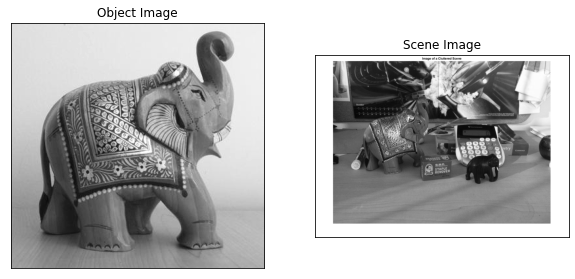

In [ ]:
# Convert images to grayscale
object_gray = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)
scene_gray = cv2.cvtColor(scene_img, cv2.COLOR_BGR2GRAY)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(object_gray, cmap = 'gray')
plt.title('Object Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(scene_gray, cmap = 'gray')
plt.title('Scene Image'), plt.xticks([]), plt.yticks([])
plt.show()


### Key Points and Descriptors detection

Run one of the following cells to detect the keypoints and descriptors of the images.  
- SIFT
- ORB
- AKAZE
- BRISK
- KAZE

#### SIFT

In [ ]:
# Feature detector
# SIFT-0 (Scale Invariant Feature Transform)
# ORB-1 (Oriented FAST and Rotated BRIEF)
# BRISK-2 (Binary Robust Invariant Scalable Keypoints)
# KAZE-3 (Accelerated-SIFT)
# AKAZE-4 (Accelerated-KAZE)
option = 0
match option:
    case 0:
        fd =cv2.SIFT_create()
    case 1:
        fd =cv2.ORB_create()
    case 2:
        fd =cv2.BRISK_create()
    case 3:
        fd =cv2.KAZE_create()
    case 4:
        fd =cv2.AKAZE_create()      
    case _:
        fd =cv2.SIFT_create()

# Find the keypoints and descriptors

kp1, des1 = fd.detectAndCompute(object_gray,None)
kp2, des2 = fd.detectAndCompute(scene_gray,None)    

### Matching

In [ ]:
# TODO TRY ANOTHER MATCHER
# Match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)


### Outliers removal

##### Lowe Ratio Test

In [ ]:
# TODO: test different ratio values
# Apply ratio test
good = []
for match_pair in matches:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good.append(m)
    

##### RANSAC

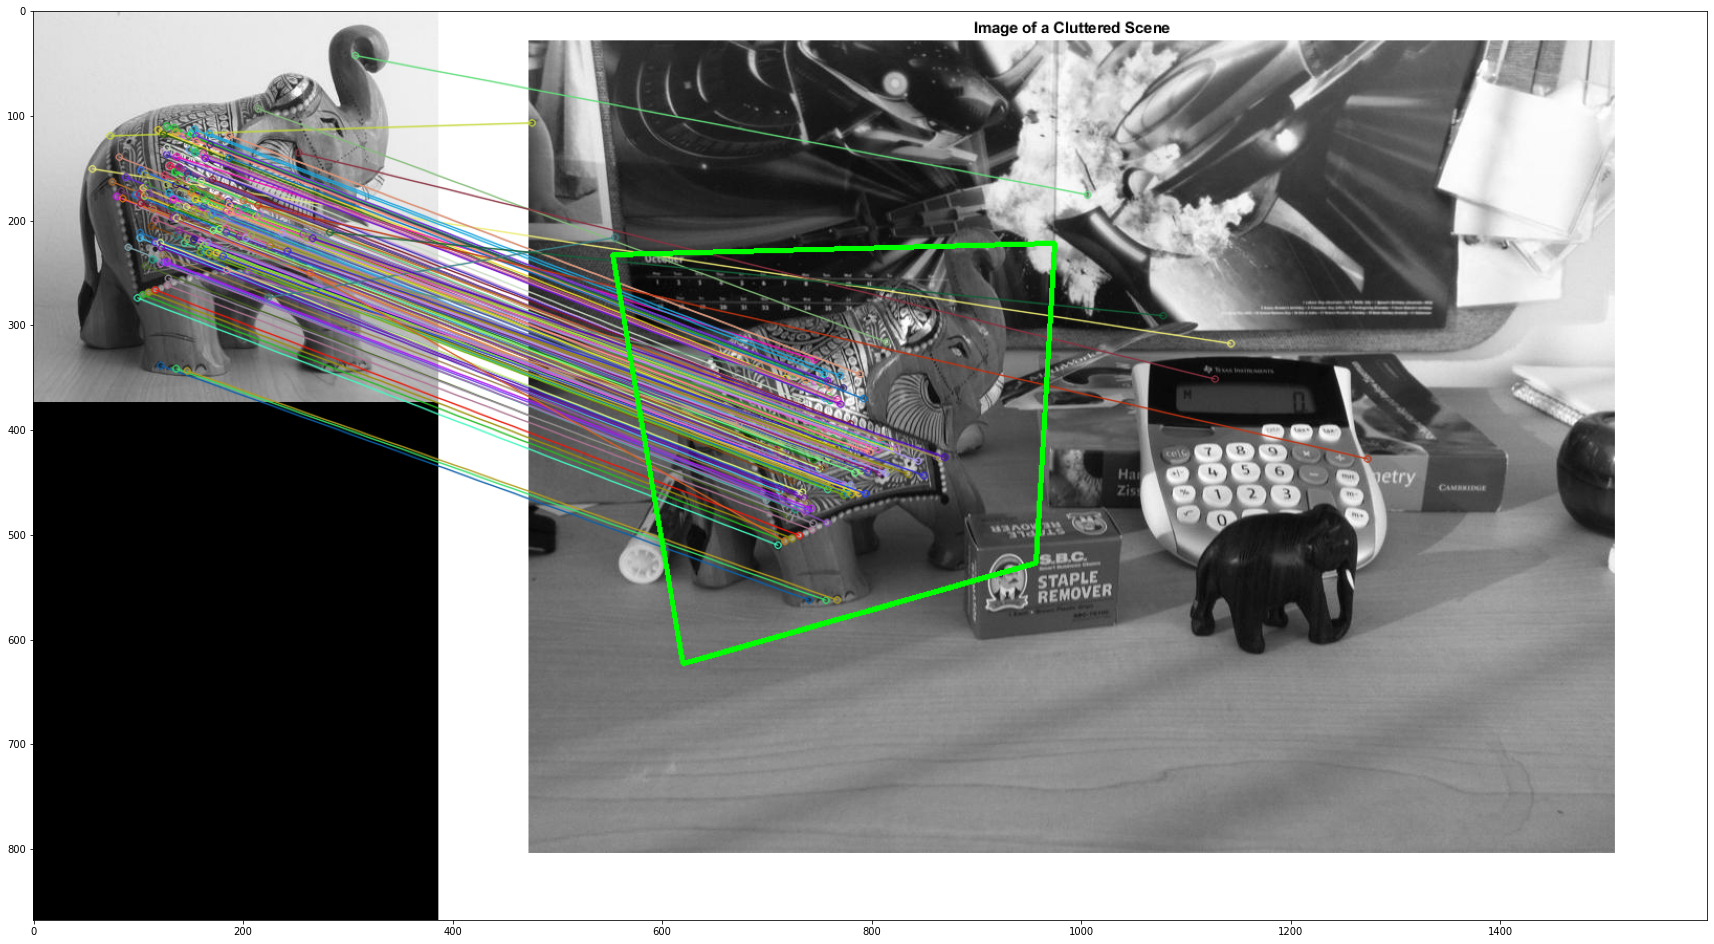

In [ ]:
# TODO: test different parameters; influence of using the RANSAC method or not

# Draw matches
img_matches = cv2.drawMatches(object_img, kp1, scene_img, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# Find the object in the scene
object_corners = np.float32([[0, 0], [object_img.shape[1], 0], [object_img.shape[1], object_img.shape[0]], [0, object_img.shape[0]]])
scene_corners, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
scene_corners = cv2.perspectiveTransform(object_corners.reshape(-1, 1, 2), scene_corners).reshape(-1, 2)

# Draw lines around the object in the scene
for i in range(4):
    pt1 = (int(scene_corners[i][0] + object_img.shape[1]), int(scene_corners[i][1]))
    pt2 = (int(scene_corners[(i+1)%4][0] + object_img.shape[1]), int(scene_corners[(i+1)%4][1]))
    cv2.line(img_matches, pt1, pt2, (0, 255, 0), 4)


# Show detected matches
plt.figure(figsize=(30,30))
plt.imshow(img_matches, cmap = 'gray')
#plt.savefig('results/task1/wally.png')
plt.show()


## Task 2
[[go back to the top] ](#Table-of-contents)

## Task 3
[[go back to the top] ](#Table-of-contents)

## Task 4
[[go back to the top] ](#Table-of-contents)